In [3]:
import pandas as pd

df = pd.read_csv('Test_box1.csv')
display(df[['Name','Team','Date','STL','BLK','AST','TO','DREB','REB','FGM','FGA','3PM','3PA','PTS','FantasyPts']])

,Name,Team,Date,STL,BLK,AST,TO,DREB,REB,FGM,FGA,3PM,3PA,PTS,FantasyPts
0,Trista Hull,Portland Pilots,03/01/25,0,1,0,0,5,5,4,5,2,3,12,29
1,Alexis Mark,Portland Pilots,03/01/25,3,0,0,4,8,10,6,9,0,1,20,42
2,Maisie Burnham,Portland Pilots,03/01/25,5,0,2,5,2,5,2,14,0,4,20,27
3,Emme Shearer,Portland Pilots,03/01/25,1,0,3,1,5,7,7,16,0,4,28,43
4,McKelle Meek,Portland Pilots,03/01/25,1,0,2,4,2,2,1,4,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Edie Clarke,Saint Mary's Gaels,02/06/25,0,0,0,0,0,0,1,1,0,0,2,3
321,Mauriana Hashemian-Orr,Saint Mary's Gaels,02/06/25,3,0,3,1,1,1,1,3,0,1,2,18
322,Amy Kurkowski,Saint Mary's Gaels,02/06/25,0,0,0,0,1,1,0,1,0,1,0,0
323,Emily Foy,Saint Mary's Gaels,02/06/25,1,0,2,0,1,1,4,10,1,5,9,13


Correlation with FantasyPts:
FantasyPts    1.000000
PTS           0.814999
FGM           0.803471
DREB          0.697581
REB           0.665984
FGA           0.663419
STL           0.602308
BLK           0.560435
MIN           0.507453
3PM           0.450401
AST           0.448171
FTM           0.382273
FTA           0.360238
3PA           0.338368
OREB          0.275767
didWin        0.249601
PF            0.173550
Jersey #      0.151096
TO            0.065585
Name: FantasyPts, dtype: float64

Random Forest Feature Importances:
PTS         0.437116
FGM         0.287450
STL         0.061812
BLK         0.033716
DREB        0.027211
AST         0.025908
FGA         0.023892
REB         0.023767
Jersey #    0.016236
TO          0.012279
3PA         0.011477
MIN         0.010011
FTM         0.005768
PF          0.005623
OREB        0.005309
3PM         0.004371
FTA         0.004271
didWin      0.003782
dtype: float64


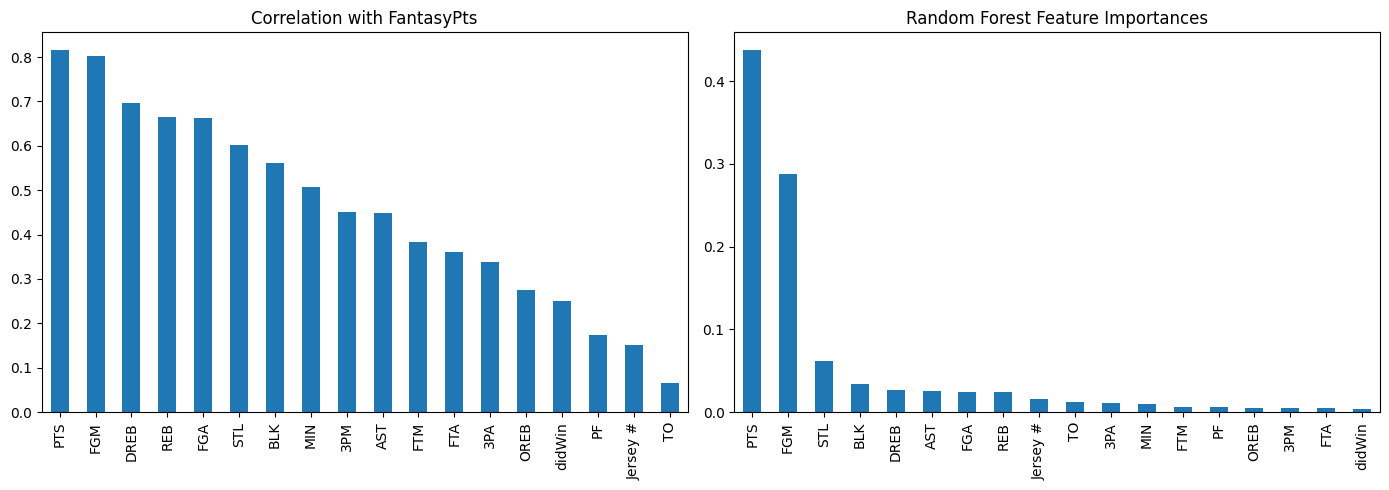

In [6]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Calculate correlation with FantasyPts
corr = df.corr(numeric_only=True)['FantasyPts'].sort_values(ascending=False)

# Display correlation scores
print("Correlation with FantasyPts:")
print(corr)

# Feature importance using RandomForestRegressor

# Prepare data
features = df.select_dtypes(include='number').drop(columns=['FantasyPts'])
target = df['FantasyPts']

# Fit model
rf = RandomForestRegressor(random_state=42)
rf.fit(features, target)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

print("\nRandom Forest Feature Importances:")
print(importances)

# Plot correlation and feature importances
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
corr.drop('FantasyPts').plot(kind='bar', ax=axes[0], title='Correlation with FantasyPts')
importances.plot(kind='bar', ax=axes[1], title='Random Forest Feature Importances')
plt.tight_layout()
plt.show()

In [8]:
df = pd.read_csv('lastseason.csv')
display(df[['Player','Team','STL','BLK','AST','TO','DREB','TRB','FGM','FGA','3PM','3PA','PTS','FantasyPts']])

,Player,Team,STL,BLK,AST,TO,DREB,TRB,FGM,FGA,3PM,3PA,PTS,FantasyPts
0,Yvonne Ejim,Gonzaga,45.5,35.0,87.5,105.0,213.5,9.3,280.0,528.5,10.5,45.5,724.5,1588
1,Freja Werth,San Francisco,40.3,12.4,46.5,80.6,151.9,6.1,170.5,415.4,65.1,179.8,530.1,845
2,Emme Shearer,Portland,72.0,18.0,97.2,86.4,104.4,4.2,205.2,424.8,50.4,140.4,601.2,1216
3,Maisie Burnham,Portland,57.6,14.4,93.6,90.0,118.8,5.1,187.2,410.4,43.2,118.8,586.8,1129
4,Olivia Pollerd,Santa Clara,21.0,54.0,69.0,78.0,162.0,6.5,189.0,459.0,54.0,171.0,480.0,978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Vera Gunaydin,Gonzaga,1.7,1.7,3.4,3.4,3.4,0.5,1.7,20.4,1.7,11.9,3.4,-5
135,Lexi Boles,Loyola Marymount,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-3
136,Mali Ennis,St. Mary's (CA),0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
137,Kiana Moniz,San Francisco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


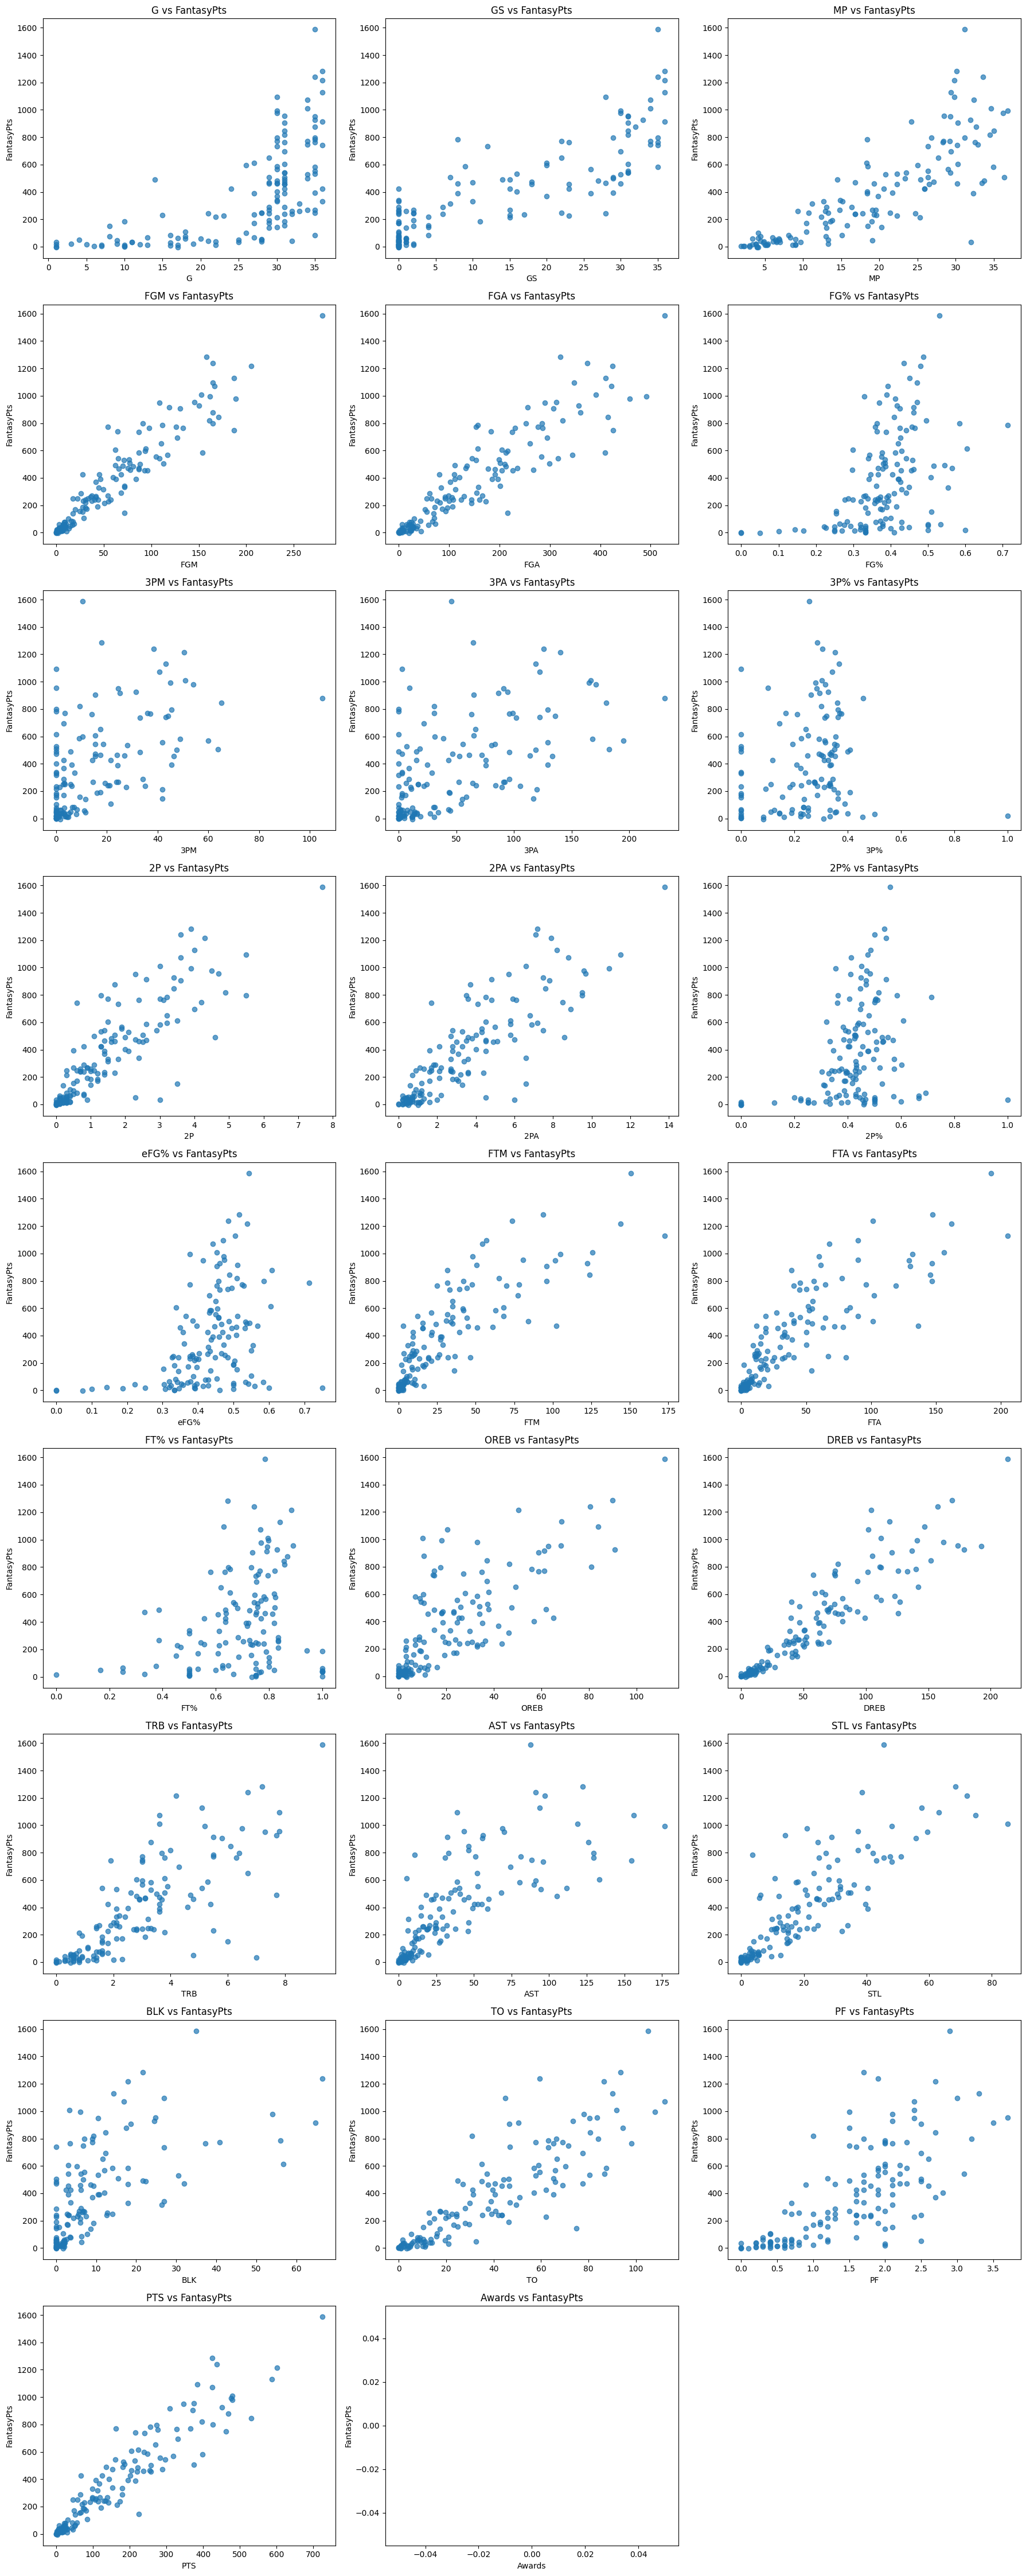

In [12]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns.drop(['FantasyPts', 'Rk', 'Unnamed: 0'], errors='ignore')
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(18, 5 * (len(numeric_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].scatter(df[col], df['FantasyPts'], alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('FantasyPts')
    axes[i].set_title(f'{col} vs FantasyPts')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Calculate correlation with FantasyPts
corr = df.corr(numeric_only=True)['FantasyPts'].sort_values(ascending=False)

# Display correlation scores
print("Correlation with FantasyPts:")
print(corr)

Correlation with FantasyPts:
FantasyPts    1.000000
FGM           0.945124
PTS           0.940214
DREB          0.917550
FGA           0.916578
TO            0.857354
GS            0.856975
FTA           0.851535
2PA           0.847424
2P            0.847034
STL           0.843352
FTM           0.842581
MP            0.826918
TRB           0.779554
AST           0.770614
OREB          0.763464
PF            0.713243
G             0.649561
BLK           0.630786
3PA           0.559407
3PM           0.527973
FG%           0.457165
eFG%          0.404011
2P%           0.308253
FT%           0.248232
3P%           0.167286
Rk           -0.854459
Unnamed: 0   -0.855162
Awards             NaN
Name: FantasyPts, dtype: float64
